## Christopher Botts
## DSC630
## Week 4
## Assigment 4.2

In [17]:
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
als = pd.read_csv('als_data.csv')

In [4]:
als.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [5]:
als.shape

(2223, 101)

In [6]:
als.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


In [15]:
# remove the id columns
als = als.drop(['ID', 'SubjectID'], axis=1)

In [137]:
#confirm columns were removed
als.shape

(2223, 99)

In [20]:
# create a correlation matrix to remove redundant variables  
corr = als.corr()
corr

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
Age_mean,1.000000,-0.276195,-0.349024,-0.297121,0.053197,-0.015301,0.049054,0.057733,0.041025,0.038163,...,0.005432,-0.039712,0.080449,0.071736,0.089325,0.065092,0.036559,-0.001532,0.002561,-0.008615
Albumin_max,-0.276195,1.000000,0.780141,0.596662,0.223350,0.037438,0.113349,0.090439,0.058077,-0.072609,...,0.013677,-0.040877,-0.048029,0.080261,0.057346,0.042903,-0.064183,0.075413,-0.046885,-0.138430
Albumin_median,-0.349024,0.780141,1.000000,0.761269,-0.091822,0.059234,0.153280,0.128122,0.099099,-0.099966,...,0.007380,-0.017818,-0.069380,0.097823,0.084183,0.072317,-0.088370,0.056894,-0.042497,-0.118506
Albumin_min,-0.297121,0.596662,0.761269,1.000000,-0.369015,0.112154,0.158924,0.172940,0.188007,-0.151358,...,0.046761,0.074240,-0.086457,0.095974,0.113639,0.134409,-0.114685,0.034555,-0.001877,-0.049783
Albumin_range,0.053197,0.223350,-0.091822,-0.369015,1.000000,-0.226123,-0.142900,-0.166473,-0.188223,0.264209,...,0.030864,0.020971,0.177163,-0.086105,-0.110648,-0.124018,0.211769,-0.011823,0.038553,0.022866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trunk_min,0.065092,0.042903,0.072317,0.134409,-0.124018,0.488530,0.590336,0.729634,0.845515,-0.576628,...,0.029731,0.059450,-0.098606,0.633160,0.791262,1.000000,-0.620503,-0.067544,-0.013682,0.020322
trunk_range,0.036559,-0.064183,-0.088370,-0.114685,0.211769,-0.686407,-0.022388,-0.252393,-0.549288,0.815212,...,-0.008379,-0.007871,0.173634,0.082453,-0.209821,-0.620503,1.000000,0.013725,0.051023,0.021281
Urine.Ph_max,-0.001532,0.075413,0.056894,0.034555,-0.011823,-0.037779,-0.034254,-0.072189,-0.089458,0.043252,...,-0.052230,-0.058276,0.005643,-0.031953,-0.046946,-0.067544,0.013725,1.000000,0.487953,0.073412
Urine.Ph_median,0.002561,-0.046885,-0.042497,-0.001877,0.038553,-0.064897,-0.031396,-0.038370,-0.024922,0.079291,...,0.040815,0.109544,0.021791,-0.041352,-0.023227,-0.013682,0.051023,0.487953,1.000000,0.525513


In [139]:
# compile a list of features that are highly correlated

corr_lst = []

for x in corr.columns:
    for i in range (0, len(corr[x])):
        
        c = (x, i, corr[x][i])
        
        if corr[x][i] == 1:
            pass
        elif corr[x][i] > .9:
            corr_lst.append(c)
        elif corr[x][i] < -.9:
            corr_lst.append(c)
        else:
            pass 

corr_lst

[('Hematocrit_max', 56, 0.9911824995521487),
 ('Hematocrit_max', 57, 0.9716462850235632),
 ('Hematocrit_median', 55, 0.9911824995521487),
 ('Hematocrit_median', 57, 0.9842241375092821),
 ('Hematocrit_min', 55, 0.9716462850235632),
 ('Hematocrit_min', 56, 0.9842241375092821),
 ('mouth_max', 68, 0.9075063213174741),
 ('mouth_median', 67, 0.9075063213174741),
 ('Platelets_median', 75, 0.9308947596801026),
 ('Platelets_min', 74, 0.9308947596801026)]

In [140]:
# extract feature names from corr_lst
corr_col = []

for i in range (0, len(corr_lst)):
    corr_col.append(corr_lst[i][0])

corr_col

['Hematocrit_max',
 'Hematocrit_max',
 'Hematocrit_median',
 'Hematocrit_median',
 'Hematocrit_min',
 'Hematocrit_min',
 'mouth_max',
 'mouth_median',
 'Platelets_median',
 'Platelets_min']

In [141]:
# remove redundant features from working dataframe 
als1 = als.drop(corr_col, axis=1)

print(als1.shape)

(2223, 92)


In [101]:
# Apply a standard scaler to the data 
scaler = StandardScaler()

als_scaled = scaler.fit_transform(als1)

In [106]:
# set parameters for kmeans model
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2,
}

In [142]:
# build a list of silhouette cofficients using a range of 1-10 clusters
silhouette_coefficients = []


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(als_scaled)
    score = silhouette_score(als_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
    
silhouette_coefficients

[0.08427791275404525,
 0.07095447545647132,
 0.07655201047522943,
 0.04649237421631014,
 0.03992722108952154,
 0.04295292445274337,
 0.04160389320299629,
 0.037397249249135775,
 0.03330594823940692]

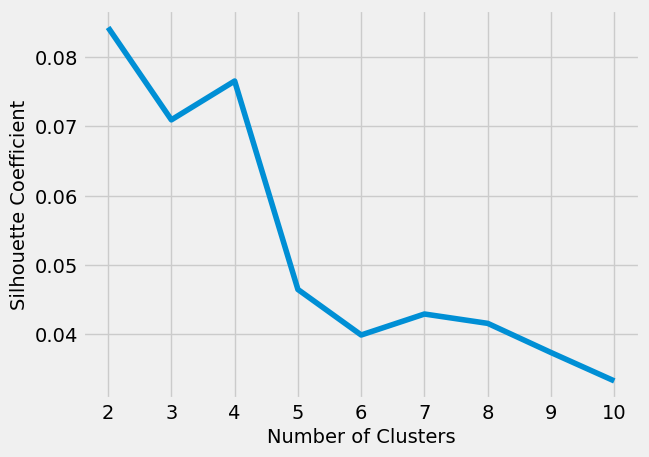

In [114]:
# plot the cluster silhouette score against the number of clusters 
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Choose an optimum number of clusters 
 Utilizing 2, 3 or 4 clusters could make a good model because each of these cluster values has a silhouette coeffecient of greater than 0.7. There is a steep drop off in the silhouette score when the cluster size increase to greater than 4. In this case, a model using two clusters will be built because the silhouette coeffecient is maximized at two clusters. 


In [117]:
# fit a kmeans model with two clusters
kmeans1 = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans1.fit(als_scaled)

KMeans(init='random', n_clusters=2, n_init=10, random_state=2)

In [143]:
# fit a PCA transformation with two features to the scaled data
pca = PCA(n_components = 2)
t_pca = pca.fit_transform(als_scaled)

Text(0.5, 1.0, 'Principal Component Analysis of ALS Dataset')

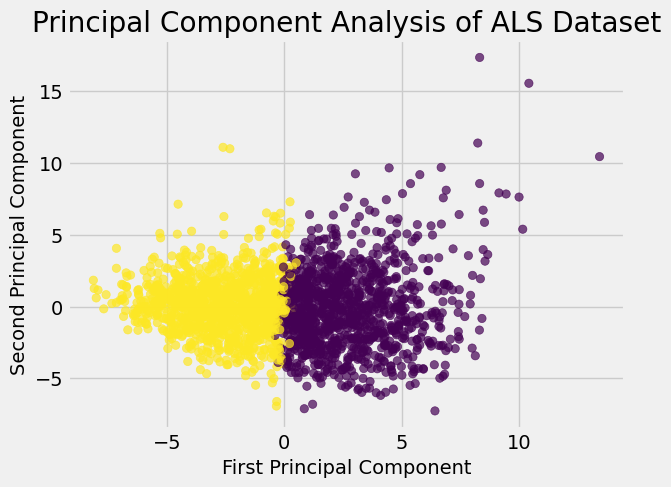

In [149]:
# make a scatterplot of the PCA transformed data, color coded by cluster
plt.scatter(t_pca[:,0],t_pca[:,1], c=kmeans1.labels_, alpha=0.7)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Principal Component Analysis of ALS Dataset')

### Conclusion
This project involved applying a classification model on a dataset of ALS test results. Utilizing silhouette scores, it was determined that the optimal number of clusters to create from this dataset is two. A cluster number of two was used as a parameter in a kmeans model to classify the records into one of two groups. 
After redundant features were removed, the als dataset still included a large number of features that were to be used in the classification model. The solution to this was a Principal Component Analysis. Using PCA, predictive inputs were reduced to two. When the clusters were plotted using the results of the PCA, the two clusters were clearly defined. There is not much overlap between the groups suggesting that the data supports the distinction of two groups.